### tf版本

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

## 1.矩阵相加

In [2]:
input1 = tf.ones([2, 3])
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result 

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### tf.ones 用法

In [3]:
input1 = tf.ones([2, 3], 'int32')
output = input1

with tf.Session():
  result = output.eval()
result

array([[1, 1, 1],
       [1, 1, 1]])

### tf.range

In [4]:
output = tf.range(0, 9, 2)
with tf.Session():
  result = output.eval()
result

array([0, 2, 4, 6, 8])

### tf.reshape

In [5]:
input1 = tf.range(1, 7)
output = tf.reshape(input1, [2, 3])
with tf.Session():
  result = output.eval()
result

array([[1, 2, 3],
       [4, 5, 6]])

## 2.矩阵乘法

In [6]:
input1 = tf.ones([2, 3], 'int32')
output = input1 * 3

with tf.Session():
  result = output.eval()
result

array([[3, 3, 3],
       [3, 3, 3]])

In [7]:
input1 = tf.ones([2, 3], 'int32')
output = (input1 * 3) * (input1 * 4)

with tf.Session():
  result = output.eval()
result

array([[12, 12, 12],
       [12, 12, 12]])

## 3.显卡支持

In [8]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 4.比较GPU和CPU速度

In [9]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.0095042
GPU (s):
1.8338158000000004
GPU speedup over CPU: 1x


## 5.画图支持

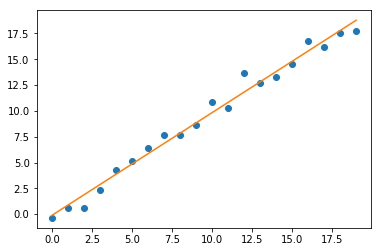

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

### 5.1 arange用法同tf.range

In [13]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### 5.2 list内for迭代

In [15]:
x = np.arange(20)
[x_i for x_i in x]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]